In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 141.32001847288518
Iteration 2, RMSE: 159.4793635554281
Iteration 3, RMSE: 218.21976202252387
Iteration 4, RMSE: 209.62028179315982
Iteration 5, RMSE: 275.8492597300327
Iteration 6, RMSE: 182.59875030324056
Iteration 7, RMSE: 237.79955532471922
Iteration 8, RMSE: 234.2770305172541
Iteration 9, RMSE: 176.8986270483098
Iteration 10, RMSE: 174.84601205639737
Iteration 11, RMSE: 169.620070820029
Iteration 12, RMSE: 144.24168317563633
Iteration 13, RMSE: 169.01300687864378
Iteration 14, RMSE: 169.4156665608899
Iteration 15, RMSE: 130.20151039549128
Iteration 16, RMSE: 131.24401405726869
Iteration 17, RMSE: 128.76530877700515
Iteration 18, RMSE: 118.25012687359444
Iteration 19, RMSE: 142.54452082166532
Iteration 20, RMSE: 141.5399991058003
Iteration 21, RMSE: 107.78661630645577
Iteration 22, RMSE: 107.11412683844516
Iteration 23, RMSE: 105.37850280852518
Iteration 24, RMSE: 97.20541489114204
Iteration 25, RMSE: 118.50978310664459
Iteration 26, RMSE: 117.62247782859932
Iter

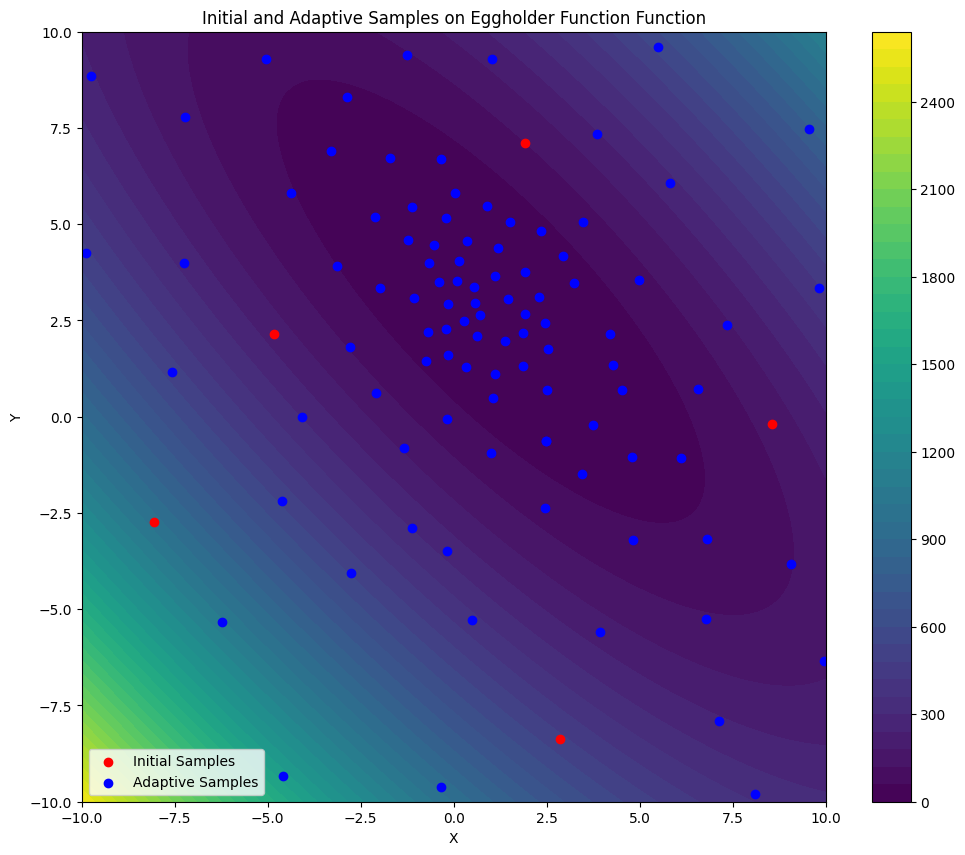

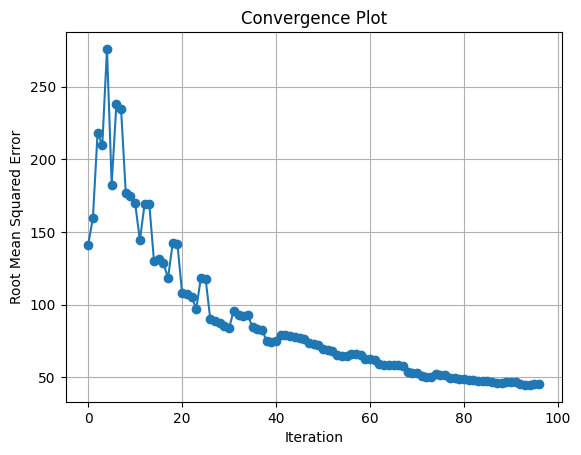

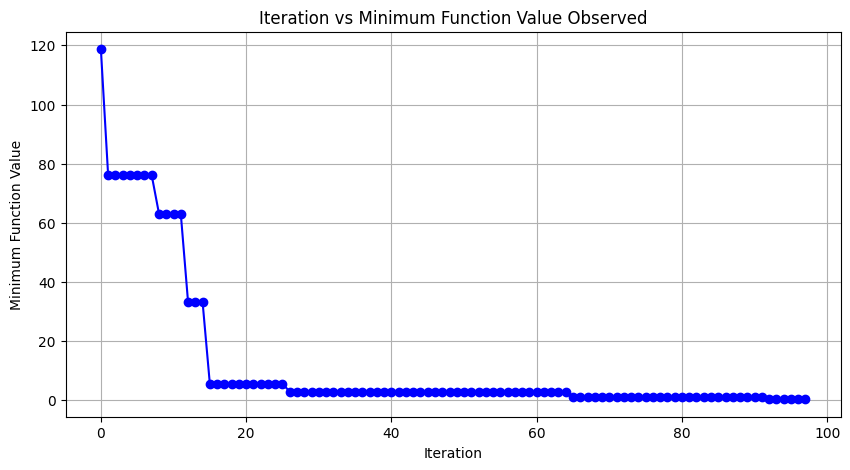

Best observed function value after active learning: 0.348996172317379
            X         Y
0    1.920695  7.104426
1    8.567988 -0.186050
2   -8.052437 -2.731885
3   -4.840631  2.137583
4    2.861343 -8.366212
..        ...       ...
98  -0.214278  2.285431
99   0.096797  3.529027
100  1.110104  1.118511
101  2.484418 -0.625775
102  2.484418 -0.625775

[103 rows x 2 columns]


In [4]:
range_param = ex_func.function_ranges["Booth"]
function_param = ex_func.booth

# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh(range_param, num_points=100, function= function_param)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(function_param)
initial_points = sampler.sample(num_samples=5, ranges = range_param)
initial_values = np.array([function_param([x, y]) for x, y in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z, "Eggholder Function")